<a id='menu'></a>
<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1.0"> 

 ![logos](../images/la_dsc_logo.jpg)
 
 <hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1.0"> 

# Data Visualisation in Python

## Chapter 4 – Plotting Two Variables
### Hannah Hodge Waller

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.25"> 

Follow along with the code by running cells as you encounter them
<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.25"> 

*Chapter Overview*
1. [Packages and Data](#packages_data)
<br><br>
2. [Continuous X, Continuous Y](#continuous_x_y)
<br><br>
    2.1.[Scatter Plots Revisited](#scatter)
<br><br>
3. [Continuous Functions](#continuous)
<br><br>
    3.1. [Line Plots](#line)  
<br><br>    
4. [Discrete X, Continuous Y](#discrete)
<br><br>
    4.1. [Bar Charts Revisted](#bar)
    <br>
    4.2. [Box Plots](#box)
    <br>
    4.3. [Violin Plots](#violin)
<br><br>     

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='packages_data'></a>
# 1. Packages and Data

Let’s start, as always by loading our packages and our data.

We’re using:

* Numpy – Version 1.12.1 
* Pandas – Version 0.20.1 
* Matplotlib – Version 2.0.2  (here as the `pyplot` module)
* Seaborn - Version 0.7.1

Remember you can use the `.__version__` attribute (e.g `np.__version__` ) to check your version.

More information about the packages is given in Chapter 1.

We're following standard convention for nicknames, and we’ll also load the gapminder data.

In [1]:
 # Load packages
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams 

# Load data

gapminder = pd.read_csv("../data/gapminder.csv")

We’ll also use the magic command 

``` python 
% matplotlib inline
```

This means any plot we create will be automatically embedded below the code cell once the code has been executed.

In [2]:
% matplotlib inline

 When we load Seaborn it uses it’s style as the default one; overriding Matplotlib. 
 
Here I’m setting the default style to ticks which is the most similar to our Matplotlib default.

Here we’ll also bring in those default values we talked about in the last chapter.

In [3]:
# Set Default Fonts

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Arial", "Tahoma"]

# Set Default font sizes

small_size = 12
medium_size = 14
bigger_size = 16

# Change the font size for individual elements

matplotlib.rc("font", size=small_size)          # controls default text sizes
matplotlib.rc("axes", titlesize=small_size)     # fontsize of the axes title
matplotlib.rc("axes", labelsize=medium_size)    # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=small_size)    # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=small_size)    # fontsize of the tick labels
matplotlib.rc("legend", fontsize=small_size)    # legend fontsize
matplotlib.rc("axes", titlesize=medium_size)    # title fontsize

In [4]:
sns.set_style("whitegrid")

 As a reminder visualisation code can get lengthy quickly.
  
A lot of these visualisations will only have one or two new concepts, the other code will be things covered previously.

To make the code clearer we will be using lots of comments. In Python these look like this:

```python

# This is a comment

```

As we get into more complicated visualisations  new  concepts will have the word NEW -  at the start of the comment e.g:

``` python

#  NEW - Set X Axis

```

We will also refer to line numbers to describe content.You can turn on line numbers in the View Menu -> Toggle Line Numbers

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='continuous_x_y'></a>
# 2. Continuous X, Continuous Y
   

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id='scatter'></a>
## 2.1 Scatter Plots Revisited
 

We covered scatter plots in great detail in chapter 2, however we will revisit some elements here.

As a basic reminder we plot scatter plots like this in:

Matplotlib

In [5]:
# Make our 1987 data again
gm_1987 = gapminder[gapminder["year"] == 1987]

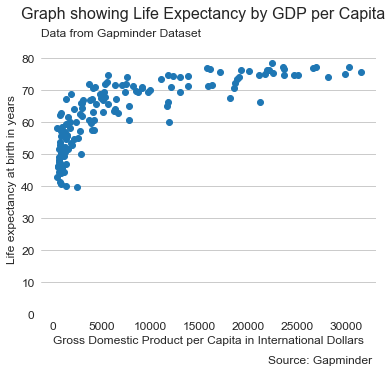

In [6]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])


# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)


# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));


# Set Gridlines and colours
# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

Pandas:

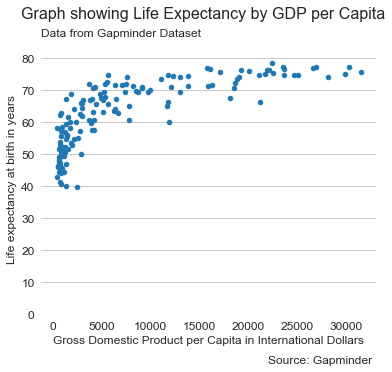

In [7]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
gm_1987.plot(x = "gdp_per_cap", y = "life_exp",
             kind = "scatter",
             ax = axes) # Plot on the axes

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")
figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 2.1.1 Choosing Your Axis

We covered this in chapter 2 – but just to reiterate there are several ways to set the values of the x and y axes. These include:
*  ` axes.set(ylim=(0), xlim= (0))`
* `axes.set_ylim(bottom=0, top = 10000) ` and `axes.set_xlim(left=0)`
* `plt.xlim()` and `plt.ylim()`

If we don’t pass a parameter like `top` matplotlib will automatically decide for us.
We discussed the importance of setting the y axis to start at 0, here I’ve used ` axes.set_ylim(bottom=0, top = 85)` which gives more white space above the top of the data, this can make the points at the top more readable.

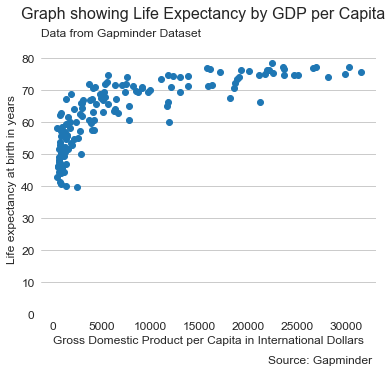

In [8]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"])


# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

And Seaborn

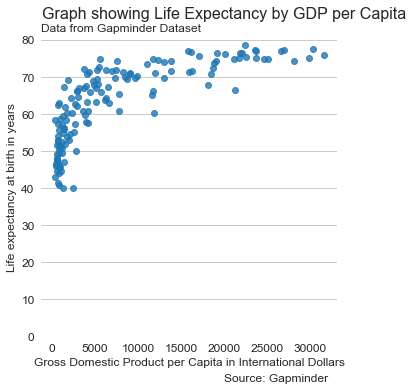

In [9]:
plot = sns.lmplot(x = "gdp_per_cap", y = "life_exp", data = gm_1987,
                  fit_reg = False )

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.05, x = 0.65)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.01)
plt.text(x= 20000.0, y = -12, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# Get axes and change grid lines and colours
axes = plot.ax
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Note the methods are set_xlabels -with an s!
plot.set_xlabels("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
plot.set_ylabels("Life expectancy at birth in years", fontname="Arial", size=12)

plt.ylim(0, None); # Set our Y axis to start from 0 or it "floats")


As of version 0.9.0 Seaborn has a function called `sns.scatterplot()` at current time of writing (November 2020). These versions might not be available within your government department, as they are quite new. If you can upgrade, you may need to update other packages (e.g numpy and scipy). We recommend working in a virtual environment to do so; especially if you require certain versions of packages for your role. If you want to experiment, with non sensitive data than options like Google Colab will let you experiment with packages without installing to your machine.

For this plot the code will be given as a markdown cells. This is because they won't run for everyone if they are in a code cell, there will also be an image of the output.

```python
# Plot
plot = sns.scatterplot(x = "gdp_per_cap", y = "life_exp", data = gm_1987)

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)
plot.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.0, x = 0.5)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.01, x = -0.06)
plt.text(x= 20000.0, y = -20, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# Note the methods are set_xlabel
plot.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
plot.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

plt.ylim(0, None); # Set our Y axis to start from 0 or it "floats")
```

![Seaborn Scatter Plot](../images/seaborn_scatter.png)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 2.1.2 Changing Markers

#### Marker type

All three types of plot use the markers from matplotlib. You can find a table of markers and definitions [on the matplotlib website](https://matplotlib.org/3.1.1/api/markers_api.html).

Note here the paramater in matplotlib and using `.plot()` is `marker`

The paramater in Seaborn is `markers`

#### Marker size.

This can be achived in `matplotlib` and `.plot()` by adding the parameter

`s`

These are measured in points; like fonts. Each point is equivilant to 1/72 of an inch. While it's possible some people measure out their ideal point size and apply it; most visualisations generally involve experimenting until something looks "about right"

The `s` parameter may work in newer version of Seaborn; however the following parameter will if it does not.

```python
scatter_kws={"s": 72}
```

Sufficient google searching couldn't find the specific scale of measurment for these markers; but again advice seemed to follow the "stop when it looks about right" family.

#### Marker colours

We covered colours in depth in chapter 2. 

In Matplotlib and `.plot()` colours can be altered using the `color` paramater and a variety of methods including:

```python

color = "blue" # Using named or web safe colours)
color = (0, 0.239, 0.349) 
# Using RGB colours, each expressed as a decimal from 1 to 0 
color = "#A0E7E5" # Using hexidacimal codes

```

Matplotlib:

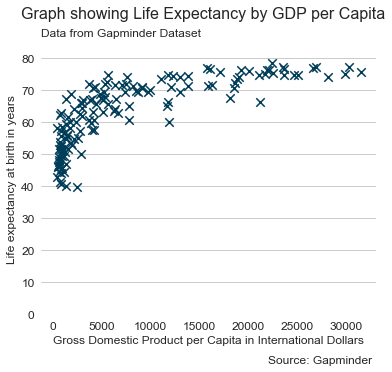

In [10]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
             marker = "x", # Set marker style
             s = 72, # Set Size
             color = (0, 0.239, 0.349)) # Set colour


# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")
figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

Pandas:

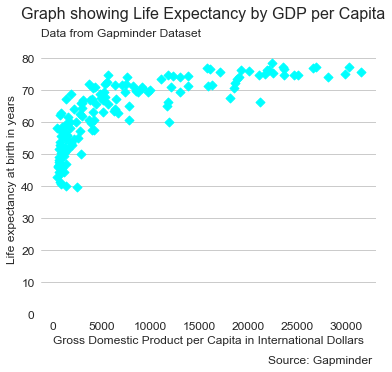

In [11]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
gm_1987.plot(x = "gdp_per_cap", y = "life_exp",
             kind = "scatter", 
             marker = "D", # Set marker style
             s = 40, # Set Marker Size
             color = "cyan", # Set color
             ax = axes) # Plot on the axes

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

For Seaborn we can include colours in the `scatter_kws={}` dictionary. 

This accepts most of the methods shown above, but struggles with RGB values. 

The transparancy (or alpha) in Seaborn seems to be set around 80% so don't worry if your colours don't come out quite as you'd expect them. We'll look at how to sort the alpha in the next section.

`scatter_kws={"color": "#4C2C2E"} `

Note that we can put both the `size` and the `color` arguments in the same dictionary e.g

`scatter_kws={"s": 200, "color": "#4C2C2E"}`

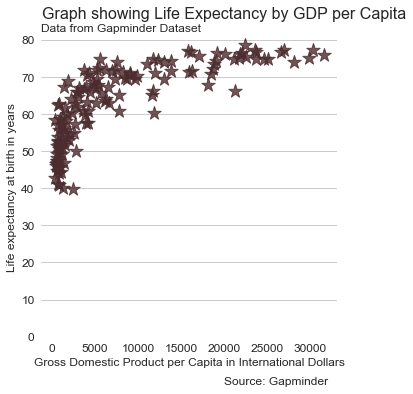

In [12]:
plot = sns.lmplot(x = "gdp_per_cap", y = "life_exp", data = gm_1987,
                  fit_reg = False,
                  markers = "*",
                  palette= "red", 
                  scatter_kws = {"s": 200,
                                 "color": "#4C2C2E"})

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.05, x = 0.65)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.01)
plt.text(x= 20000.0, y = -13, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# Note the methods are set_xlabels -with an s!
plot.set_xlabels("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
plot.set_ylabels("Life expectancy at birth in years", fontname="Arial", size=12)

# Get axes and change grid lines and colours
axes = plot.ax
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

plt.ylim(0, None); # Set our Y axis to start from 0 or it "floats")


<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 2.1.3 Using Alpha With Large Amounts Of Data

We also talked about alpha in chapter 2. This can be really useful with large amounts of data.

For our Matplotlib and `.plot()` charts this is as simple as setting the `alpha = ` to a decimal between 0 (transparent) and 1 (solid)

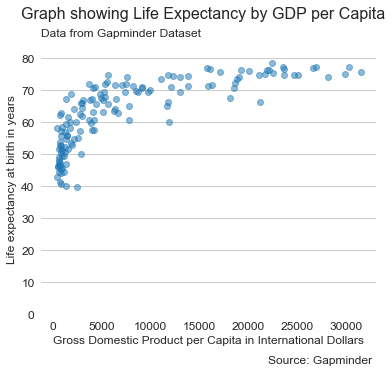

In [13]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.scatter(x=gm_1987["gdp_per_cap"], y=gm_1987["life_exp"],
             alpha = 0.5) # Set colour


# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

Pandas:

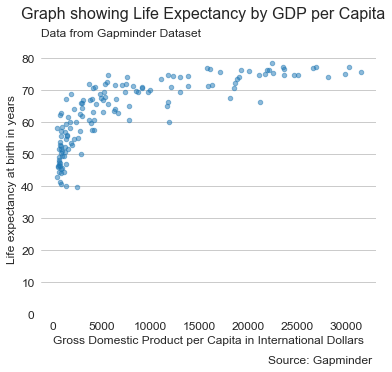

In [14]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
gm_1987.plot(x = "gdp_per_cap", y = "life_exp",
             kind = "scatter", 
             alpha = 0.5,
             ax = axes) # Plot on the axes

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

For Seaborn this is set in our `scatter_kws{}` dictionary using `alpha` as the key. 

Frustratingly in the `sns.lmplot()` alpha seems to be automatically set to around 80%, bear this in mind when choosing colours!

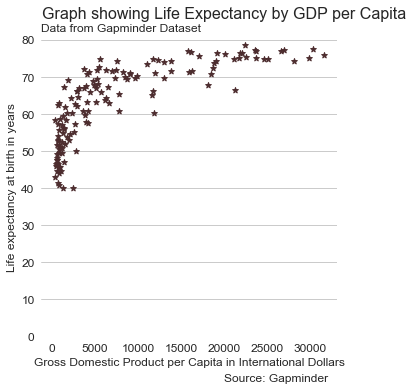

In [15]:
plot = sns.lmplot(x = "gdp_per_cap", y = "life_exp", data = gm_1987,
                  fit_reg = False,
                  markers = "*",
                  palette = "red", 
                  scatter_kws = {"alpha" : 1, 
                               "color": "#4C2C2E"})

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Graph showing Life Expectancy by GDP per Capita", 
             fontname="Arial", size=16, y = 1.05, x = 0.65)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.01)

plt.text(x= 20000.0, y = -12 , s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# Note the methods are set_xlabels -with an s!
plot.set_xlabels("Gross Domestic Product per Capita in International Dollars", fontname="Arial", size=12)
plot.set_ylabels("Life expectancy at birth in years", fontname="Arial", size=12)

# Get axes and change grid lines and colours
axes = plot.ax
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

plt.ylim(0, None); # Set our Y axis to start from 0 or it "floats")


[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='continuous'></a>
# 3. Continuous Functions

<a id='line'></a>
## 3.1 Line Plots       

In Matplotlib the function `axes.plot()` produces a line plot.

The data we pass goes in the order x and then y – however we just pass them in order – we **don’t** pass parameters here like we have done previously.

In [17]:
# Set up some new data to plot
uk_gapminder = gapminder[gapminder["country"] == "United Kingdom"]

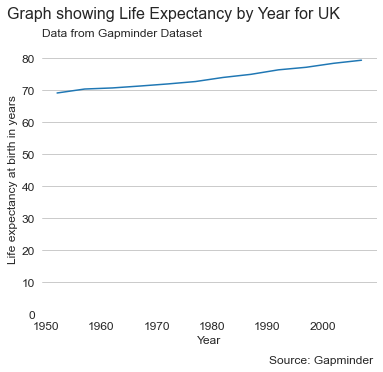

In [18]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.plot(uk_gapminder["year"], uk_gapminder["life_exp"])

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, x = 0.43)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

If we also do a scatter plot of the same data we can notice how there’s some smoothing of the line happening. My scatter plot dots are not perfectly sat in the middle of the line.

Note that I’ve not set the y axis to 0 here – just to make it easier to see that the line smoothed.

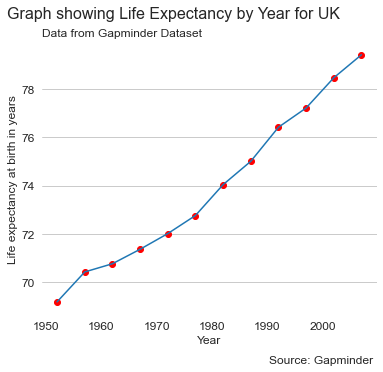

In [19]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.plot(uk_gapminder["year"], uk_gapminder["life_exp"])

# Plot the Data
axes.scatter(x = uk_gapminder["year"], y = uk_gapminder["life_exp"],
             color = "red")


# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, x = 0.43)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True);

Panda’s `.plot()` by default creates a line graph. 

Here I’ve specified `kind = “line”` to make it clear to the user what the output will be if they’re just reading the code.

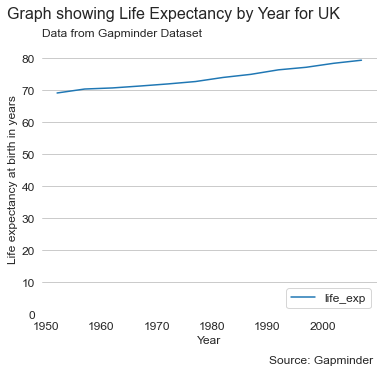

In [20]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
uk_gapminder.plot(x = "year", y = "life_exp",
                  kind = "line",
                  ax = axes) # Plot on the axes

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, x = 0.43)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)


# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85)

axes.legend(loc = "lower right");

Interestingly Seaborn only introduced lineplots from version 0.9.

As mentioned in Scatterplots above for these plots the code will be given as markdown cells. This is because they won't run for everyone if they are in a code cell, there will also be an image of the output.

### Seaborn Relplot

``` python
plot = sns.relplot(x = "year", y = "life_exp", data= uk_gapminder,
                   kind = "line")

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, y = 1.06, x = 0.35)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.01, x = -0.13)
          
plt.text(y = -12, x = 1989, s = "Source: Gapminder", ha="left",
            fontname="Arial", size=12)

#Set the X and Y axis Labels
# Note the methods are set_xlabels -with a s!
plot.set_xlabels("Year", fontname="Arial", size=12)
plot.set_ylabels("Life expectancy at birth in years", fontname="Arial", size=12)

# Get axes and plot grids
axes = plot.ax
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set the Y axis lower limit to 0 and upper to 90 to give space.
plt.ylim(0, 90); # Set our Y axis to start from 0 or it "floats")

```

![Seaborn Relplot](../images/sns_relplot_uk_life_exp.png)

### Seaborn Lineplot

``` python
# Lineplot will plot onto a figure and axes object - giving more fine controll.
figure, axes = plt.subplots(figsize=(6, 5))

# Create the plot
plot = sns.lineplot(x = "year", y = "life_exp", data = uk_gapminder)

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, y = 1.0, x = 0.35)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.04, x = -0.13)
plt.text(y = -12, x = 1989, s = "Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# Note the methods are set_xlabel here -
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Get axes and plot grids
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set the Y axis lower limit to 0 and upper to 90 to give space.
plt.ylim(0, 90); # Set our Y axis to start from 0 or it "floats")

```

![Seaborn Relplot](../images/sns_lineplot_uk_life_exp.png)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 3.1.1 Plotting Through The Origin     

As we’ve previously covered good practice is to plot through the origin. As mentioned above there are several ways to do this.

Note the visualisation on the left; where the y axis has not been set to 0 appears to be a much steeper curve than the one on the right where the axis has been adjusted. This could be considered misleading.

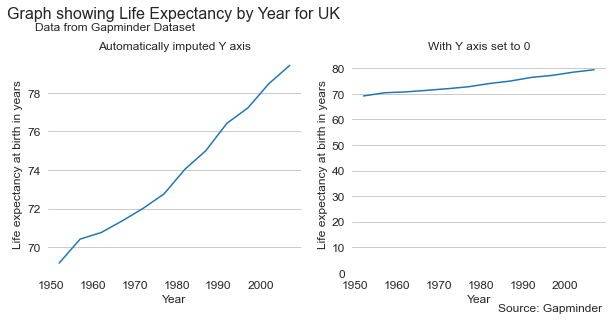

In [21]:
# Create our figure and our axes
figure, (axes1, axes2) = plt.subplots(1, 2, figsize=(10, 4))

### Axes 1 ###
# Plot the Data for ax 1
axes1.plot(uk_gapminder["year"], uk_gapminder["life_exp"])

# Set x and y axis labels
axes1.set_xlabel("Year", fontname="Arial", size=12)
axes1.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)
axes1.set_title("Automatically imputed Y axis", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes1.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes1.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes1.set_frame_on(False)
axes1.set_axisbelow(True)

### Axes 2 ###
# Plot the Data for ax 2
axes2.plot(uk_gapminder["year"], uk_gapminder["life_exp"])

# Set x and y axis labels
axes2.set_xlabel("Year", fontname="Arial", size=12)
axes2.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)
axes2.set_title("With Y axis set to 0", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes2.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes2.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes2.set_frame_on(False)
axes2.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes2.set_ylim(bottom=0, top = 85)   


# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, x = 0.3, y = 1.05)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", x = -1.25, y = 1.09)

figure.text(x=0.75, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12);


<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 3.1.2 Line Styles    

Matplotlib Linestyles include

``` python
[‘solid’, ‘dashed’, ‘dashdot’, ‘dotted’ | '-', '--', '-.', ':', 'None' ]

```

More details can be found in the [matplotlib documentation pages](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)

Some of these are duplicates – “dotted” and “:” produce an identical result. Note again that “dotted” makes more sense to humans reading code than “:” does.

The same arguments also work for our `.plot()` visualisation.

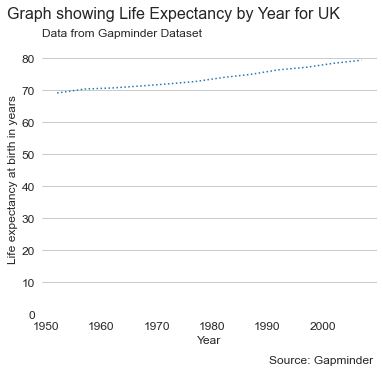

In [22]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.plot(uk_gapminder["year"], uk_gapminder["life_exp"],
          linestyle = "dotted") # NEW set a linestyle

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, x = 0.43)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

The same arguments also work for our `.plot()` visualisation.

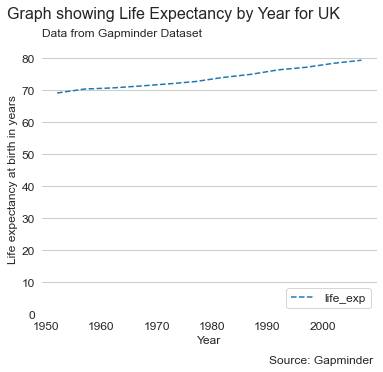

In [23]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
uk_gapminder.plot(x = "year", y = "life_exp",
                  kind = "line",
                  ax = axes, # Plot on the axes
                  linestyle = "dashed" ) # NEW - Set a linestyle.

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, x = 0.43)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85)

axes.legend(loc = "lower right");

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 3.1.3 Line Colours

We can set colours the same ways as we’ve seen before. Here we’ll just show a few visualisations for demonstration purposes.

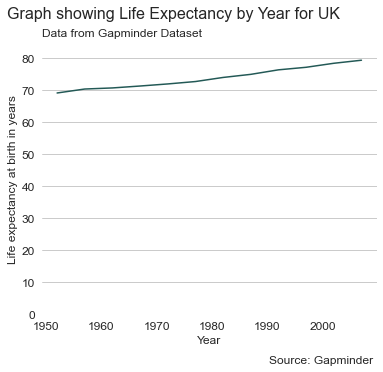

In [24]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.plot(uk_gapminder["year"], uk_gapminder["life_exp"],
          color = "#235956") # NEW set a colour

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, x = 0.43)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85);

The same arguments also work for our `.plot()` visualisation.

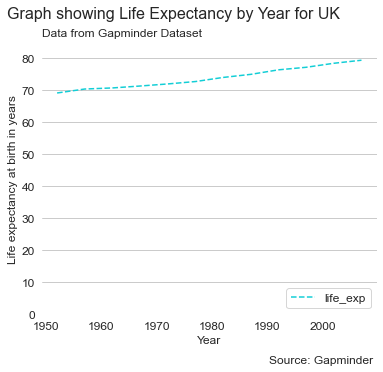

In [25]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
uk_gapminder.plot(x = "year", y = "life_exp",
                  kind = "line",
                  ax = axes, # Plot on the axes
                  linestyle = "dashed", # NEW - Set a linestyle.
                  color = (0.076, 0.808, 0.84 ))

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year for UK", 
             fontname="Arial", size=16, x = 0.43)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left")

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85)

axes.legend(loc = "lower right");

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

### 3.1.4 Plotting Multiple Lines    

As we saw in chapter 2 with scatter plots we can plot multiple lines on the same axis.

#### Matplotlib

This can be something as simple as creating multiple `ax.plot()` objects.

You can also consider labeling the lines rather than, or in additon to an index.

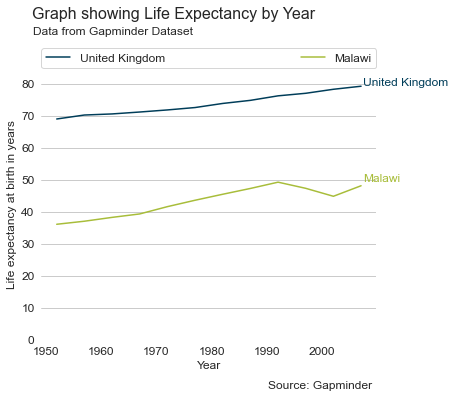

In [26]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data Line for UK
axes.plot(gapminder[gapminder["country"] == "United Kingdom"]["year"],  # Our "x"
          gapminder[gapminder["country"] == "United Kingdom"]["life_exp"], # Our "y"
          color = "#003D59", # Set colour
          label = "United Kingdom" ) # Set label

axes.annotate("United Kingdom",
              xy = (gapminder[gapminder["country"] == "United Kingdom"]["year"].max() + 0.3,
                   gapminder[gapminder["country"] == "United Kingdom"]["life_exp"].max()),
              color = "#003D59") # Set colour)


axes.plot(gapminder[gapminder["country"] == "Malawi"]["year"],  # Our "x"
          gapminder[gapminder["country"] == "Malawi"]["life_exp"], # Our "y"
          color = "#A8BD3A", # Set a colour
          label = "Malawi")

axes.annotate("Malawi",
              xy = (gapminder[gapminder["country"]== "Malawi"]["year"].max() + 0.3, #x + little pad
                   gapminder[gapminder["country"]== "Malawi"]["life_exp"].max()), #y
              color = "#A8BD3A") # Set colour)          

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by Year", 
             fontname="Arial", size=16, x = 0.43, y = 1.05)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.1, x = -0.025)

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Set Gridlines and colours
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)
axes.set_axisbelow(True)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85)

# Customise and show the Legend
axes.legend(bbox_to_anchor=(0., 1.0, 1.0, .102), loc="lower left",
            ncol=2, 
            mode="expand", 
            borderaxespad=0,
            prop={"family": "Arial", "size":12});

As we’ve seen before we can also use a loop to plot multiple values. Caution should be taken here to not overload a line plot with data and create a “spaghetti plot”.

Plotting a line for each of the values in country (142) or even for the countries in Europe (30) would be far too many. For these plots we’ll plot the mean life expectancy per year by continent. To do this group by continent and year, and find the mean life expectancy.


In [27]:
continent_year_life_exp = gapminder.groupby(["continent", "year"])["life_exp"].mean().reset_index()

Now we have just 5 lines to plot, but still can get an overview of our data.

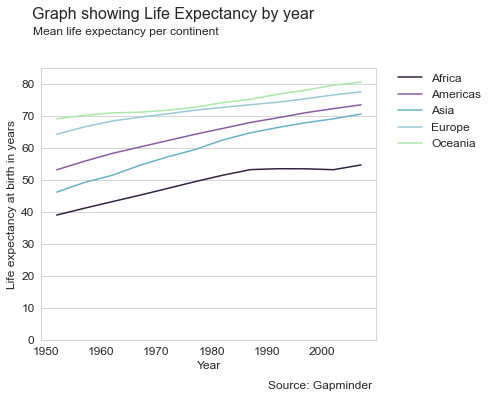

In [28]:
# Set up the arguments for the loop
continents = continent_year_life_exp["continent"].unique().tolist() # Create a list with each unique value in continent column
continents.sort() # Sort this list in alphabetical order
my_palette = ["#342040", "#865CA1", "#66B2C4" ,"#98C8D4", "#A9E8A6"] # Create a list of colours I want

# zips together our continent names and pallete colours into one list of tuples
continent_palette = zip(continents, my_palette) 

# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Loop through each continent and each colour in turn
for continent_name, colour in continent_palette: # New now has for 3 things not 2
    # Get only the data for the continent we are looking at
    continent_rows = continent_year_life_exp[continent_year_life_exp["continent"] == continent_name]
    
    axes.plot(continent_rows["year"], 
              continent_rows["life_exp"],
              c=colour, # Use corresponding colour from continent_palette
              label=continent_name) # Gives each continent a label for our legend

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by year", 
             fontname="Arial", size=16, x = 0.43, y = 1.05)
plt.title("Mean life expectancy per continent" , 
          fontname="Arial", size=12, loc="left", y = 1.1, x = -0.025)

figure.text(x=0.65, y=-0.01, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)
axes.set_xlabel("Year", fontname="Arial", size=12)
axes.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)

# Set the Y axis lower limit to 0
axes.set_ylim(bottom=0, top = 85)

# Gridlines
axes.grid(b = True , which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
#axes.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Customise and show the Legend
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0,
           frameon=False, # Turn off border around legend
           prop={"family": "Arial", "size":12});

We can also use our multiplot method here:

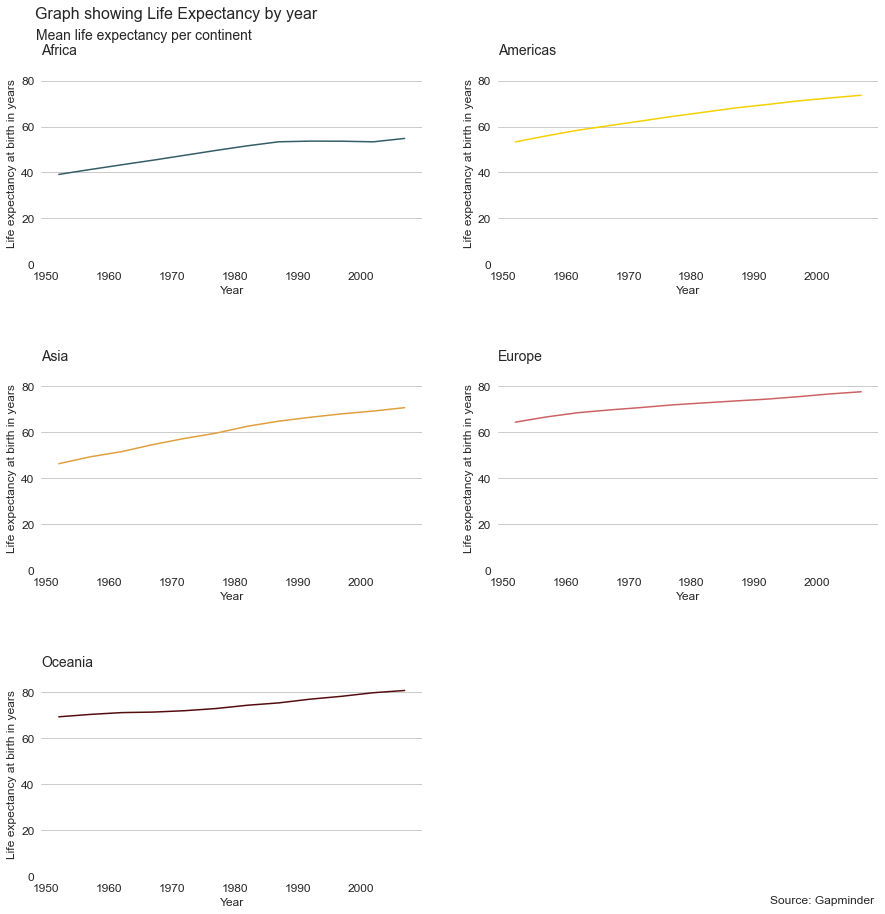

In [29]:
# NEW - # Set up the arguments for the loop
continents = continent_year_life_exp["continent"].unique().tolist() # Create a list with each unique value in continent column
continents.sort() # Sort this list in alphabetical order
my_palette = ["#335C67" ,"#F5D000", "#E09F3E", "#CC6163", "#540B0E"] # Create a list of colours I want

# Create our figure and our axes
figure, axes = plt.subplots(nrows= 3,
                            ncols=2, figsize=(15, 15))
figure.subplots_adjust(hspace=0.5)

# zips together our axes, continent names and pallete colours into one list of tuples
continent_palette = zip(axes.flatten(), continents, my_palette) 

# Loop through each continent and each colour in turn
for each_ax, continent_name, colour in continent_palette:
        
    # Get only the data for the continent we are looking at
    continent_rows = continent_year_life_exp[continent_year_life_exp["continent"] == continent_name]

    each_ax.plot(continent_rows["year"], 
                 continent_rows["life_exp"],
                 c=colour)# Use corresponding colour from continent_palette
    
    each_ax.set_title(label = continent_name, loc = "left")
    each_ax.set_xlabel("Year", fontname="Arial", size=12)
    each_ax.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)
    each_ax.grid(b = True, which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
    each_ax.grid(b = True, which = "both", axis = "y", color = (0.745, 0.745, 0.745))
    each_ax.set_frame_on(False)
    each_ax.set_axisbelow(True)
    # Set the x and y lims to be the same for each vis - or we loose scale.
    each_ax.set_ylim(bottom=0, top = ( continent_year_life_exp["life_exp"].max() + (continent_year_life_exp["life_exp"].max() / 10) ))



# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by year", 
             fontname="Arial", size=16, y = 0.93, x = 0.25)
figure.text(x=0.12, y= 0.9, s="Mean life expectancy per continent", ha="left",
            fontname="Arial", size=14)
figure.text(x=0.8, y= 0.1, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# Remove the empty plot at the bottom right
figure.delaxes(axes[2][1]); # Rows and Cols - starts at 0

This code allows us to create a chart for multiple distributions. This allows us to plot all of the lines, highlighting one line (in this case continent) per plot.

Here we’ve looped using the [enumerate]( https://www.programiz.com/python-programming/methods/built-in/enumerate) method, which is useful as it also gives an index to each iteration of the loop.

With enumerate we need to loop over the same amount of items as subplot axes we’re creating (here 6). That’s why we’ve needed to add an empty value to the `continents` list, and to our `my_pallete` and `greys` lists. 

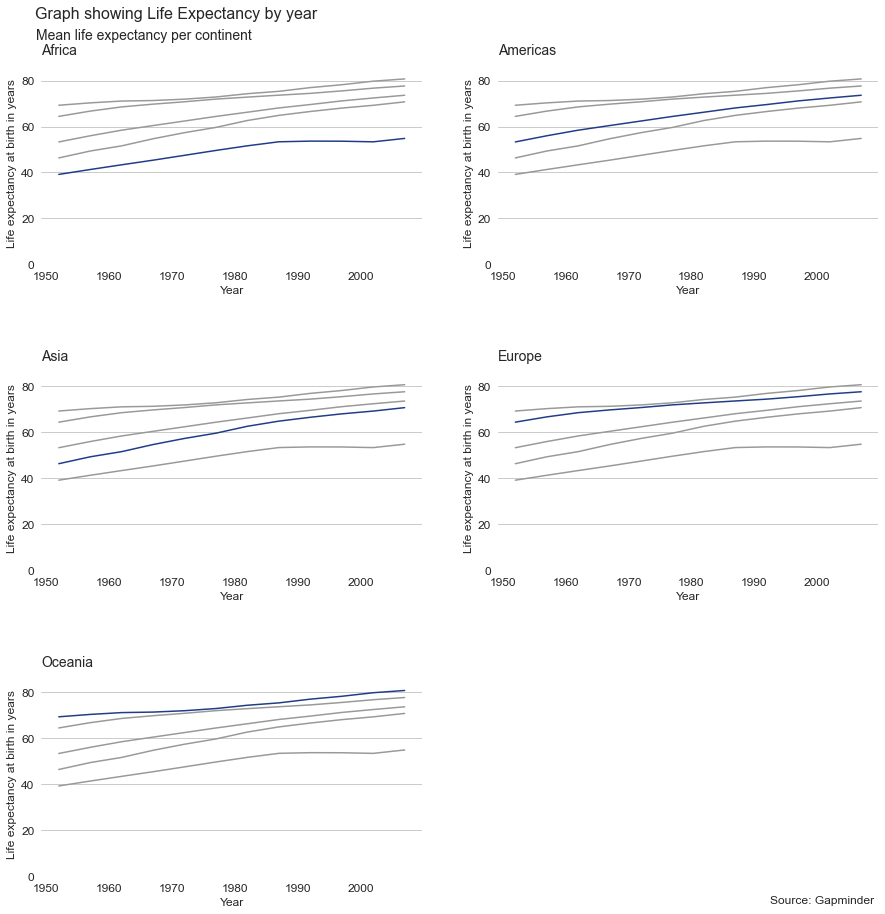

In [30]:
# Set Up
continents = continent_year_life_exp["continent"].unique().tolist()
# Create a list with each unique value in continent column
continents.sort() # Sort this list in alphabetical order
continents.append(" ") 
# We have to plot 6 subplots, even though we have 5 data sets - this adds a blank placeholder at the end.

# This will be the colour of the highlighted continetn
bold_highlight = "#203C89"
# Create our figure and our axes
figure, axes = plt.subplots(nrows= 3, ncols=2, figsize=(15, 15))  # Create a grid that's 3 x 2 (6 subplots)
figure.subplots_adjust(hspace=0.5)

# Loop through each subplot axes in turn
for index, each_ax in enumerate(axes.flatten()):
    
    greys = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999"] 
    # This needs to match the number of axes; even though there's no data on the last one
    greys[index] = bold_highlight
    # Matches our grey colours with our my_pallete colours
    
    continent_palette = zip(continents, greys) 
        # Loop through each continent and each colour in turn
    for continent_name, colour in continent_palette: # New now has for 3 things not 2
        # Get only the data for the continent we are looking at
        continent_rows = continent_year_life_exp[continent_year_life_exp["continent"] == continent_name]

        each_ax.plot(continent_rows["year"], 
                 continent_rows["life_exp"],
                 c=colour) # Use corresponding colour from continent_palette
        
    # Set our titles, labels, grid, ylimits etc
    each_ax.set_title( label = continents[index], loc = "left")
    each_ax.set_xlabel("Year", fontname="Arial", size=12)
    each_ax.set_ylabel("Life expectancy at birth in years", fontname="Arial", size=12)
    each_ax.grid(b = True, which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
    each_ax.grid(b = True, which = "both", axis = "y", color = (0.745, 0.745, 0.745))
    each_ax.set_frame_on(False)
    each_ax.set_axisbelow(True)
    # Set the x and y lims to be the same for each vis - or we loose scale.
    each_ax.set_ylim(bottom=0, top = continent_year_life_exp["life_exp"].max() 
                                      + (continent_year_life_exp["life_exp"].max() / 10))


# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by year", 
             fontname="Arial", size=16, y = 0.93, x = 0.25)
figure.text(x=0.12, y= 0.9, s="Mean life expectancy per continent", ha="left",
            fontname="Arial", size=14)
figure.text(x=0.8, y= 0.1, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

# Remove the empty plot at the bottom right
figure.delaxes(axes[2][1]); # Rows and Cols - starts at 0

We can also plot multiple lines on one plot in Seaborn; using similar parameters as the multi plot we did for scatter.

Here we have a line for each continent on the same visualisation.

```python

plot = sns.relplot(x = "year", y = "life_exp", data= continent_year_life_exp,
                   kind = "line",
                   hue = "continent")

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by year", 
             fontname="Arial", size=16, y = 1.06, x = 0.35)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, loc="left", y = 1.01, x = -0.13)
plt.text(y = -12, x = 1989, s = "Source: Gapminder", ha="left",
            fontname="Arial", size=12)

#Set the X and Y axis Labels
# Note the methods are set_xlabels -with an s!
plot.set_xlabels("Year", fontname="Arial", size=12)
plot.set_ylabels("Life expectancy at birth in years", fontname="Arial", size=12)

# Set gridlines
axes = plot.ax
axes.grid(b = True, which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
axes.grid(b = True, which = "both", axis = "y", color = (0.745, 0.745, 0.745))


# Set the Y axis lower limit to 0 and upper to 90 to give space.
plt.ylim(0, 90); # Set our Y axis to start from 0 or it "floats")

```

![Seaborn Relplot](../images/seaborn_multiline_oneaxes.png)

We can also  multiplots in Seaborn; using similar parameters as the multi plot we did for scatter.

```python
plot = (sns.relplot(x = "year", y = "life_exp", data= continent_year_life_exp,
                    kind = "line",
                    col = "continent",
                    col_wrap = 2)
        .set_titles("")  # Without this we also end up with a central title!
        .set_titles("{col_name}", loc = "left") ) # Without this the titles are "continent = Asia" etc

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions
plt.suptitle("Graph showing Life Expectancy by year", 
             fontname="Arial", size=16, y = 1.02, x = 0.21)
plt.text(x = 1942, y = 291, s = "For each continent", fontname="Arial", size=14 ) 
# When I use "title" here it removes the "Oceania" label
plt.text(x= 2050, y=-18, s="Source: Gapminder", ha="left",
            fontname="Arial", size=12)

#Set the X and Y axis Labels
# Note the methods are set_xlabels -with an s!
plot.set_xlabels("Year", fontname="Arial", size=12)
plot.set_ylabels("Life expectancy at birth in years", fontname="Arial", size=12)

# Set gridlines
for index, each_ax in enumerate(plot.axes.flatten()): 
    each_ax.grid(b = True, which = "both", axis = "x", color = "white") # Without this both grid lines are visible (bug?)
    each_ax.grid(b = True, which = "both", axis = "y", color = (0.745, 0.745, 0.745))


# Set the Y axis lower limit to 0 and upper to 90 to give space.
plt.ylim(0, 90); # Set our Y axis to start from 0 or it "floats")

```

![Seaborn Relplot](../images/seaborn_singleline_multiaxes.png)

[return to menu](#menu)

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

<a id='discrete'></a>
# 4. Discrete X, Continuous Y

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id='bar'></a>
## 4.1 Bar Charts Revisted

A lot of visualisations in this chapter are like the bar chart section in chapter 3.

The main difference is here we are specifying both an X and a Y variable, and in chapter 3 we only specified a Y variable.

As a result we **won’t** be covering things like:

* categorical variables
* horizontal bar charts
* colouring bars
* bar spacing
* Setting our X and Y limits
* Setting value labels

In this section again as the methods shown in chapter 3 will work here too. Please feel free to revist that section if you need help.

We’ll create some mean life expectancy data, by grouping by `continent` and finding the `mean` of the `life_exp` column.

In [31]:
cont_mean_life_exp = gapminder.groupby(by = "continent", as_index= False)["life_exp"].mean()

cont_mean_life_exp

,continent,life_exp
0,Africa,48.865330
1,Americas,64.658737
2,Asia,60.064903
3,Europe,71.903686
4,Oceania,74.326208


Note here rather than setting `height` to be the `count` column, if  continuous variable like the `life_exp` column is used, the bar chart will have a continuous y axis, while retaining the discrete x.

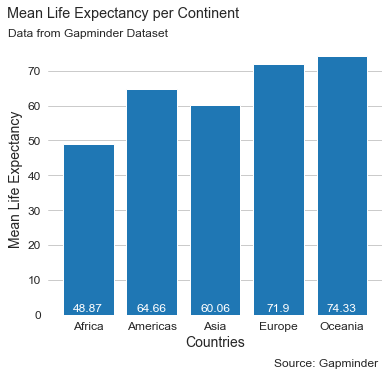

In [33]:
# Create our figure and our axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot the Data
axes.bar(cont_mean_life_exp.index,  # The X axis is the index values
         height = cont_mean_life_exp["life_exp"], # NEW
         tick_label = cont_mean_life_exp["continent"]) # Set the tick labels to be the continent names, not just numbers.

# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = "white", which = "major", )
axes.grid(b = True, axis = "y", c = (0.745, 0.745, 0.745), which = "major")
axes.set_frame_on(False)

# Add Labels, Title and Captions
plt.suptitle("Mean Life Expectancy per Continent", x=0.3)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, x = 0.12)
figure.text(x=0.65, y=-0.02, s="Source: Gapminder", ha="left")
axes.set_xlabel("Countries")
axes.set_ylabel("Mean Life Expectancy")
axes.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)



# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

# Create a list of the total values to loop over
country_mean = round(cont_mean_life_exp["life_exp"], 2).tolist() # Rounded here otherwise they're too long
# Loop over the values
for i in range(len(country_mean)):
    axes.annotate(country_mean[i], # Text is the value of the loop we're currently on
                  xy = (i, 1),  # At position 1 on the x axis, and the y position of the current loop
                  ha = "center",  # Ofset the text slightly down to be more cental
                  color = "white"); # Set the colour of the text to white


** Seaborn **

Seaborn again, makes it much easier to create this bar chart.

To match the other visualisation I need to sort my gapminder data by continent.

I can simply set my x axis to be the continent column, the y axis to be the life expectancy column (it automatically assumes I want the mean) and my data as the sorted dataframe gapminder_sort_continent.

By default the sns.barplot() has confidence interval bars on; we turn those off by setting ci = False

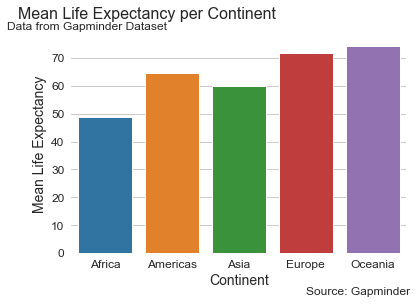

In [34]:
gapminder_sort_continent = gapminder.groupby("continent")["life_exp"].mean().reset_index()
gapminder_sort_continent.sort_values("continent").reset_index() # Sort 

bar_plot = sns.barplot(x="continent", y = "life_exp", data=gapminder_sort_continent,
                       ci = None)

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Mean Life Expectancy per Continent", x = 0.30, fontname="Arial", size=16,)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, x = 0.047)
bar_plot.text(x=3, y= -15, s="Source: Gapminder", ha="left")
bar_plot.set_xlabel("Continent")
bar_plot.set_ylabel("Mean Life Expectancy")


# Set Gridlines and colours
bar_plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set Tick Colours to the same grey as our gridlines
bar_plot.xaxis.set_tick_params(color=(0.745,0.745,0.745))
bar_plot.yaxis.set_tick_params(color=(0.745,0.745,0.745));

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 4.1.1 Multiple Bars

While this is possible in matplotlib; it is much simpler to do in Seaborn;. 

First we’ll create a new DataFrame that shows the total population per continent for each year from 1992 to 2007 (the last year in our data).


In [35]:
pop_continent_after_92 = (gapminder[gapminder["year"] >= 1992]  # Filter for data 1992 onwards
                          .groupby(["year", "continent"], as_index = False) # Group by year and continent, reseting index
                          .agg({"pop" : np.sum}) # Sum of the population
                           )

pop_continent_after_92["pop_millions"] = pop_continent_after_92["pop"] / 1000000

pop_continent_after_92.head()

,year,continent,pop,pop_millions
0,1992,Africa,6.590815e+08,659.081517
1,1992,Americas,7.392741e+08,739.274104
2,1992,Asia,3.133292e+09,3133.292191
3,1992,Europe,5.581428e+08,558.142797
4,1992,Oceania,2.091965e+07,20.919651


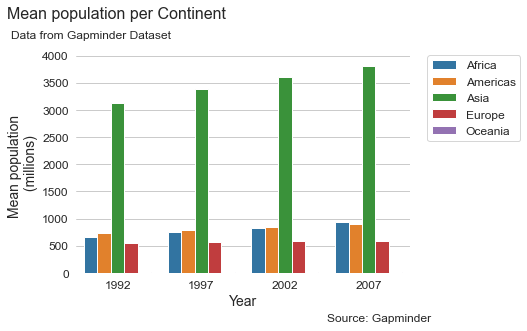

In [36]:
bar_plot = sns.barplot(x="year", y = "pop_millions" , data = pop_continent_after_92,
                       hue = "continent", # colour the bar according to the continent
                       ci = None)

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Mean population per Continent", x = 0.22, y = 1.05, fontname="Arial", size=16,)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, x = 0.047, y = 1.05)
plt.text(x=2.5, y= -900, s="Source: Gapminder", ha="left")
bar_plot.set_xlabel("Year")
bar_plot.set_ylabel("Mean population \n (millions)")

# Set Gridlines and colours
bar_plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set Tick Colours to the same grey as our gridlines
bar_plot.xaxis.set_tick_params(color=(0.745,0.745,0.745))
bar_plot.yaxis.set_tick_params(color=(0.745,0.745,0.745))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); # Moves the legend to a box outside of the plot.

Stacked bar charts are again possible in Matplotlib and Seaborn; but our simplest option is to use the `.plot()` from Pandas as this has the argument `stacked = True`.

These are commonly used for percentages, or where the bars will add up to the same number.

In this section we’ll be comparing the populations of each continent. These are represented as a percentage of the total for each year.

The plot below uses data from the years 1952, 1972, 1987 and 2002. The differences are not vast; but you can see that Europe’s population as a percentage of the whole has shrunk, and Africa’s has increased.


In [37]:
# Prepare the Data

percentage = (gapminder[gapminder["year"].isin([1952, 1972, 1987, 2002])] # Select the Years
                           .groupby(["year","continent"])["pop"].sum().rename("count") )

percentage = (percentage * 100)/ percentage.groupby(level=[0]).transform("sum") # Makes the column a percentage

percentage = percentage.reset_index()

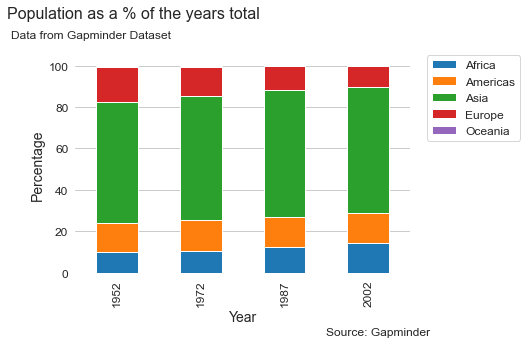

In [61]:
percentage.pivot("year", "continent", "count").plot(kind="bar" ,stacked = True)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #Moves the legend to a box outside of the plot.;

# Obtain the axes object so we can manipulate it
axes = plt.gca()

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Population as a % of the years total", x = 0.26, y = 1.05, fontname="Arial", size=16,)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, x = 0.047, y = 1.05)
plt.text(x=2.5, y= -30, s="Source: Gapminder", ha="left")
axes.set_xlabel("Year")
axes.set_ylabel("Percentage")

# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = "white", which = "major")
axes.grid(b = True, axis = "y", c = (0.745, 0.745, 0.745), which = "major")
axes.set_frame_on(False)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); # Moves the legend to a box outside of the plot.

These are more commonly seen as a horizontal version. Again; they’re not considered very good examples of visualisation and we would advise using them sparingly.

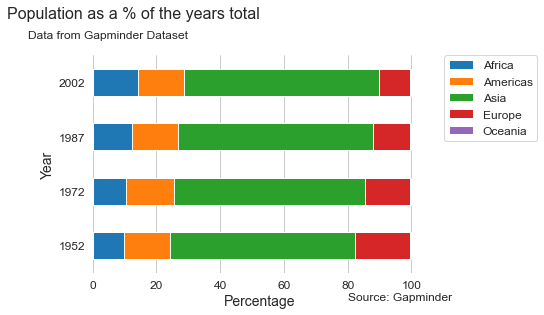

In [38]:
percentage.pivot("year", "continent", "count").plot(kind="barh" ,stacked = True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #Moves the legend to a box outside of the plot.;

# Obtain the axes object so we can manipulate it
axes = plt.gca()

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Population as a % of the years total", x = 0.22, y = 1.05, fontname="Arial", size=16,)
plt.title("Data from Gapminder Dataset" , 
          fontname="Arial", size=12, x = 0.047, y = 1.05)
plt.text(x=80, y= -1, s="Source: Gapminder", ha="left")
axes.set_ylabel("Year")
axes.set_xlabel("Percentage")

# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = (0.745, 0.745, 0.745), which = "major")
axes.grid(b = True, axis = "y", c = "white", which = "major")
axes.set_frame_on(False)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); # Moves the legend to a box outside of the plot.

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id='box'></a>
## 4.2 Box Plots

Although not commonly shown in publications we felt it was important to include box plots (and violin plots) as they’re commonly used in exploratory data analysis. As such these are often “less attractive” than previous plots we’ve seen.

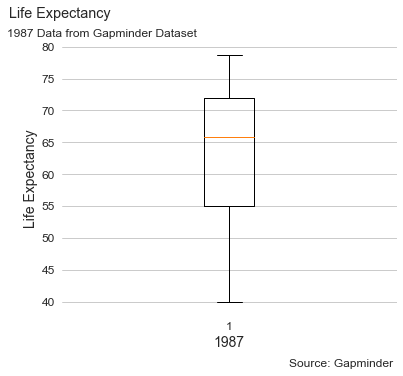

In [39]:
# Set up the Data
life_exp = gm_1987[gm_1987["life_exp"].notnull()]["life_exp"]

# Set up the axes and figure
figure, axes = plt.subplots(figsize=(6, 5))

# Plot
axes.boxplot(x = life_exp.values)  

# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = "white", which = "major")
axes.grid(b = True, axis = "y", c = (0.745, 0.745, 0.745), which = "major")
axes.set_frame_on(False)

# Add Labels, Title and Captions
plt.suptitle("Life Expectancy", x = 0.12)
plt.title("1987 Data from Gapminder Dataset", 
          fontname="Arial", size = 12, x = 0.12)

figure.text(x=0.65, y=-0.02, s="Source: Gapminder", ha="left")
axes.set_ylabel("Life Expectancy")
axes.set_xlabel("1987")
axes.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

A Pandas version also exists

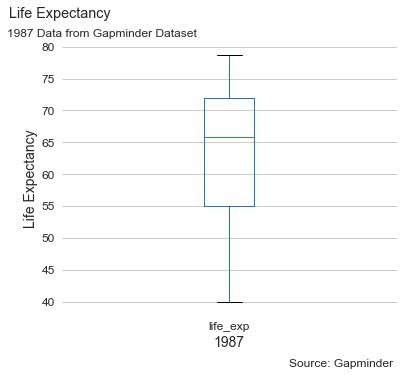

In [40]:
figure, axes = plt.subplots(figsize=(6, 5))

gm_1987.boxplot(column = "life_exp")

# Obtain the axes object so we can manipulate it
axes = plt.gca()

# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = "white", which = "major")
axes.grid(b = True, axis = "y", c = (0.745, 0.745, 0.745), which = "major")
axes.set_frame_on(False)

# Add Labels, Title and Captions
plt.suptitle("Life Expectancy", x = 0.12)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size=12, x = 0.12)

figure.text(x=0.65, y=-0.02, s="Source: Gapminder", ha="left")
axes.set_ylabel("Life Expectancy")
axes.set_xlabel("1987")
axes.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)



# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

And using Seaborn:

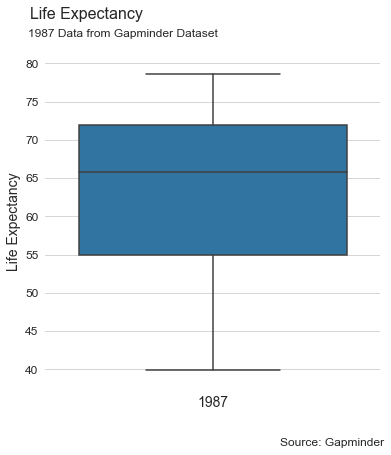

In [41]:
# Set up the figure and axes
figure, axes = plt.subplots(figsize=(6,6))

# Plot
box_plot = sns.boxplot(y = "life_exp", data = gm_1987)

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Life Expectancy", x = 0.22, y = 1., fontname="Arial", size=16,)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.23, y = 1.05)

plt.text(x=0.2, y= 30, s="Source: Gapminder", ha="left")
box_plot.set_ylabel("Life Expectancy")
box_plot.set_xlabel("1987")

# Set Gridlines and colours
bar_plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set Tick Colours to the same grey as our gridlines
box_plot.xaxis.set_tick_params(color=(0.745,0.745,0.745))
box_plot.yaxis.set_tick_params(color=(0.745,0.745,0.745));

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 4.2.1 Colours

Customisation is quite limited; again this is often an exploratory visualisation rather than explanatory.

This code also works for the Seaborn and the Pandas plots.

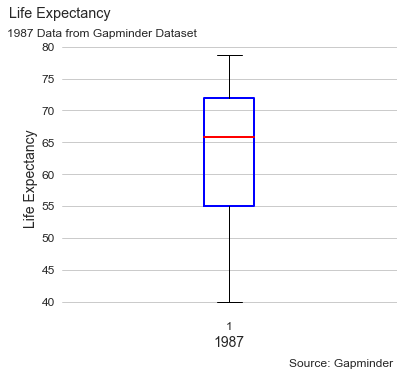

In [42]:
# Create the figure an axes
figure, axes = plt.subplots(figsize=(6, 5))

#Plot the visualisation
axes.boxplot(x = life_exp.values,
             boxprops = dict(linestyle="-", linewidth=2, color="b"), # NEW, customise the box
             medianprops = dict(linestyle="-", linewidth=2, color="r"))  # NEW customise the median


# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = "white", which = "major")
axes.grid(b = True, axis = "y", c = (0.745, 0.745, 0.745), which = "major")
axes.set_frame_on(False)

# Add Labels, Title and Captions
plt.suptitle("Life Expectancy", x = 0.12)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.12)

figure.text(x=0.65, y=-0.02, s="Source: Gapminder", ha="left")
axes.set_ylabel("Life Expectancy")
axes.set_xlabel("1987")
axes.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)



# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 4.2.2 Multiple Boxes

For multiple box plots we can do a `groupby()` and use `.get_group()` to access and plot each group. 

This is a less complicated way of plotting a multiple box plot than lopping over the boxes; although that is still a valid approach.

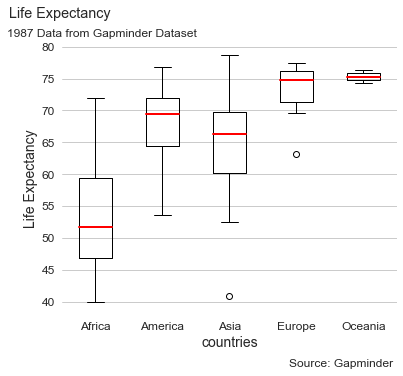

In [43]:
# Set up the figure and axis
figure, axes = plt.subplots(figsize=(6, 5))

# remove na values
life_exp = gm_1987[gm_1987["life_exp"].notnull()]

#Plot the visualisation
groups = life_exp.groupby("continent")["life_exp"]

axes.boxplot([groups.get_group("Africa"),
              groups.get_group("Americas"),
              groups.get_group("Asia"),
              groups.get_group("Europe"),
              groups.get_group("Oceania")],
              labels = ["Africa", "America", "Asia", "Europe", "Oceania"],
              medianprops = dict(linestyle="-", linewidth=2, color="r"))


# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = "white", which = "major")
axes.grid(b = True, axis = "y", c = (0.745, 0.745, 0.745), which = "major")
axes.set_frame_on(False)

# Add Labels, Title and Captions
plt.suptitle("Life Expectancy", x = 0.12)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.12)

figure.text(x=0.65, y=-0.02, s="Source: Gapminder", ha="left")
axes.set_ylabel("Life Expectancy")
axes.set_xlabel("countries")
axes.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)



# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745))


We can also do this plot easily in Seaborn by setting `hue = “continent”`

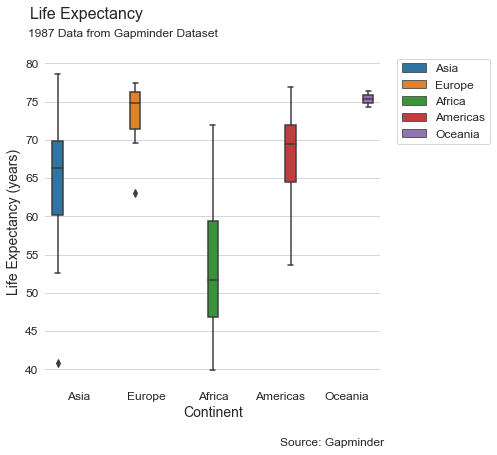

In [44]:
# Set up the figure and axes
figure, axes = plt.subplots(figsize=(6,6 ))

# Plot
box_plot = sns.boxplot(x = "continent",
                       y = "life_exp", 
                       hue = "continent",
                       data = gm_1987)
        
# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Life Expectancy", x = 0.22, y = 1., fontname="Arial", size=16,)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.23, y = 1.05)

plt.text(x=3, y= 30, s="Source: Gapminder", ha="left")
box_plot.set_ylabel("Life Expectancy (years)")
box_plot.set_xlabel("Continent")

# Set Gridlines and colours
bar_plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set Tick Colours to the same grey as our gridlines
box_plot.xaxis.set_tick_params(color=(0.745,0.745,0.745))
box_plot.yaxis.set_tick_params(color=(0.745,0.745,0.745))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); # Moves the legend to a box outside of the plot.

[return to menu](#menu)

<hr style="width:75%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.75"> 

<a id='violin'></a>
## 4.3 Violin Plots

Again, similarly for box plots, Violin plots are included because they are sometimes used in exploratory analysis.

People either love or hate violin plots, but we’ve included them for completeness.

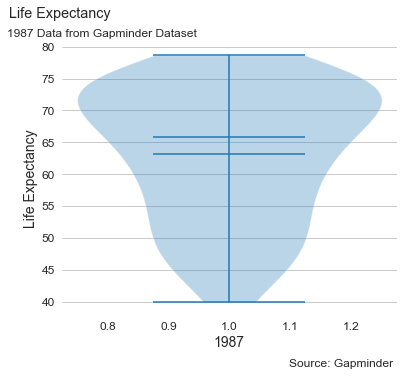

In [45]:
# Set up the figure and axis
figure, axes = plt.subplots(figsize=(6, 5))

# Remove the null values before plotting
life_exp = gm_1987[ gm_1987["life_exp"].notnull()]["life_exp"]

# Plot the violin plot
violin_parts = axes.violinplot(life_exp.values, 
                               showmeans = True,
                               showextrema = True,
                               showmedians = True)

# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = "white", which = "major")
axes.grid(b = True, axis = "y", c = (0.745, 0.745, 0.745), which = "major")
axes.set_frame_on(False)

# Add Labels, Title and Captions
plt.suptitle("Life Expectancy", x = 0.12)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.12)

figure.text(x=0.65, y=-0.02, s="Source: Gapminder", ha="left")
axes.set_ylabel("Life Expectancy")
axes.set_xlabel("1987")
axes.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

We can also use Seaborn’s `sns.violinplot()` method.

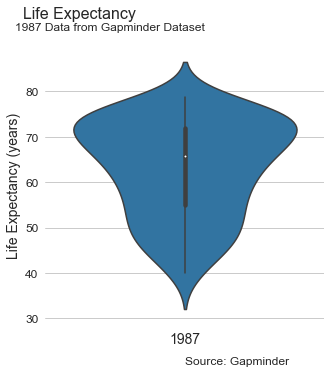

In [46]:
# Set up the figure and axis
figure, axes = plt.subplots(figsize=(5,5))

# Plot
violin_plot = sns.violinplot(y = "life_exp", 
                             data = gm_1987)

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Life Expectancy", x = 0.22, y = 1., fontname="Arial", size=16,)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.23, y = 1.05)

plt.text(x=0, y= 20, s="Source: Gapminder", ha="left")
violin_plot.set_ylabel("Life Expectancy (years)")
violin_plot.set_xlabel("1987")

# Set Gridlines and colours
violin_plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set Tick Colours to the same grey as our gridlines
violin_plot.xaxis.set_tick_params(color=(0.745,0.745,0.745))
violin_plot.yaxis.set_tick_params(color=(0.745,0.745,0.745));

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 4.3.1 Colours

It’s not as simple to change the colour as other visualisations.

In matplotlib we loop over the parts, and can change the colours this way.

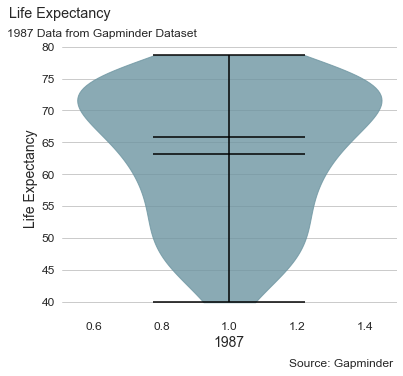

In [47]:
# Create the figure and axes
figure, axes = plt.subplots(figsize=(6, 5))

# Plot
violin_parts = axes.violinplot(life_exp.values, 
                               widths = 0.9, 
                               showmeans = True, 
                               showextrema = True, 
                               showmedians = True)

# Make all the violin statistics marks red:
for partname in ("cbars","cmins","cmaxes","cmeans","cmedians"):
    vp = violin_parts[partname]
    vp.set_edgecolor("black")
    vp.set_linewidth(1.5)

# Make the violin body blue with a red border:
for vp in violin_parts["bodies"]:
    vp.set_facecolor("#6D95A1")
    vp.set_edgecolor("#6D95A1")
    vp.set_linewidth(1)
    vp.set_alpha(0.8)
    
# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = "white", which = "major")
axes.grid(b = True, axis = "y", c = (0.745, 0.745, 0.745), which = "major")
axes.set_frame_on(False)

# Add Labels, Title and Captions
plt.suptitle("Life Expectancy", x = 0.12)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.12)

figure.text(x=0.65, y=-0.02, s="Source: Gapminder", ha="left")
axes.set_ylabel("Life Expectancy")
axes.set_xlabel("1987")
axes.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));

In Seaborn we can set the `palette = ` parameter to select our colour(s)

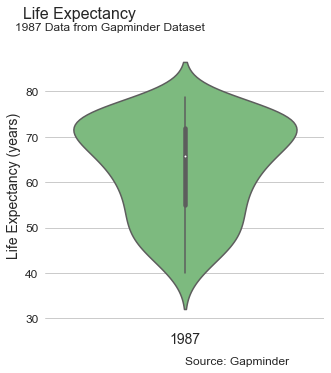

In [48]:
# Set up the figure and axis
figure, axes = plt.subplots(figsize=(5,5))

# Plot
violin_plot = sns.violinplot(y = "life_exp", 
                             data = gm_1987, 
                             palette="Greens")

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Life Expectancy", x = 0.22, y = 1., fontname="Arial", size=16,)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.23, y = 1.05)

plt.text(x=0, y= 20, s="Source: Gapminder", ha="left")
violin_plot.set_ylabel("Life Expectancy (years)")
violin_plot.set_xlabel("1987")

# Set Gridlines and colours
violin_plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set Tick Colours to the same grey as our gridlines
violin_plot.xaxis.set_tick_params(color=(0.745,0.745,0.745))
violin_plot.yaxis.set_tick_params(color=(0.745,0.745,0.745));

<hr style="width:50%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:0.5"> 

### 4.3.2 Multiple Violins

Similarly to the boxplots we can group and then plot the groups in Matplotlib.

Note to show the names of the countries we need to add ` axes.set_xticklabels(gm_1987["continent"]) `

Users with a version of Matplotlib over 3.3.0 may get the UserWarning

```

C:\Python36\envs\myenv\lib\site-packages\ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator

```

This appears to be a bug - the plot functions as intented so you can ignore this for now.

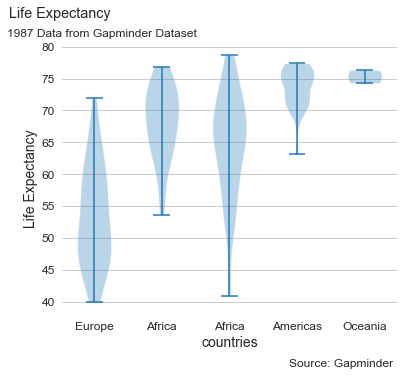

In [66]:
# Set up the figure and axis
figure, axes = plt.subplots(figsize=(6, 5))

# remove na values
life_exp = gm_1987[gm_1987["life_exp"].notnull()]

#Plot the visualisation
groups = life_exp.groupby("continent")["life_exp"]

axes.violinplot([groups.get_group("Africa"), # if you encounter any error include- .values after continent name  
                 groups.get_group("Americas"),
                 groups.get_group("Asia"),
                 groups.get_group("Europe"),
                 groups.get_group("Oceania")])

# Set Gridlines and colours
axes.grid(b = True, axis = "x", c = "white", which = "major")
axes.grid(b = True, axis = "y", c = (0.745, 0.745, 0.745), which = "major")
axes.set_frame_on(False)

# Add Labels, Title and Captions
plt.suptitle("Life Expectancy", x = 0.12)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.12)

figure.text(x=0.65, y=-0.02, s="Source: Gapminder", ha="left")
axes.set_xticklabels(gm_1987["continent"] ) # Adds the continent names in
axes.set_ylabel("Life Expectancy")
axes.set_xlabel("countries")
axes.grid(b = True, which = "major", axis = "y", color = (0.745, 0.745, 0.745))
axes.set_frame_on(False)

# Set Tick Colours to the same grey as our gridlines
axes.xaxis.set_tick_params(color=(0.745,0.745,0.745))
axes.yaxis.set_tick_params(color=(0.745,0.745,0.745));


Again in Seaborn we can simply set the `hue = ` parameter to the continent.

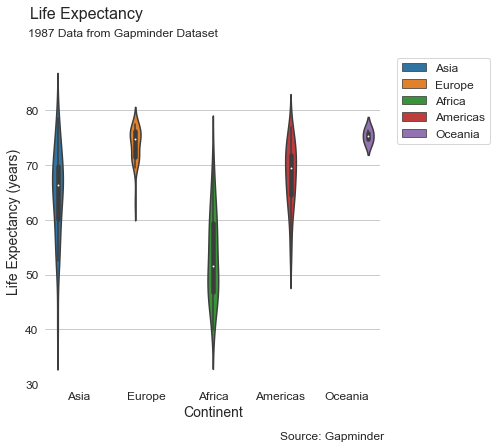

In [67]:
# Set up the figure and axes
figure, axes = plt.subplots(figsize=(6,6))

# Plot
violin_plot = sns.violinplot(x = "continent",
                             y = "life_exp", 
                             hue = "continent",
                             data = gm_1987)

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Life Expectancy", x = 0.22, y = 1., fontname="Arial", size=16,)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.23, y = 1.05)

plt.text(x=3, y= 20, s="Source: Gapminder", ha="left")
violin_plot.set_ylabel("Life Expectancy (years)")
violin_plot.set_xlabel("Continent")

# Set Gridlines and colours
violin_plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set Tick Colours to the same grey as our gridlines
violin_plot.xaxis.set_tick_params(color=(0.745,0.745,0.745))
violin_plot.yaxis.set_tick_params(color=(0.745,0.745,0.745))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); # Moves the legend to a box outside of the plot.

### 4.3.3 Horizontal Violin Plots

In Seaborn you can plot a horizontal violin plot, by changing the x and y axis, if desired

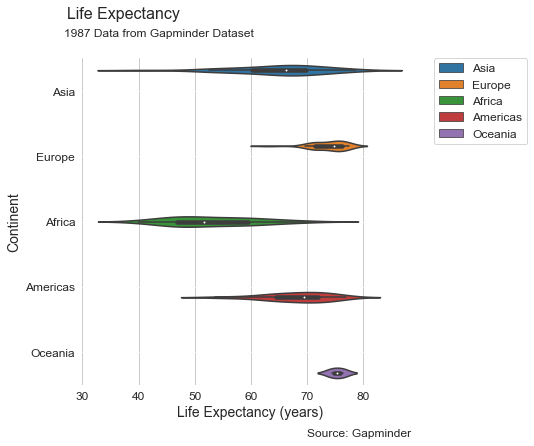

In [68]:
# Set up the figure and axes
figure, axes = plt.subplots(figsize=(6,6))

# Plot

violin_plot = sns.violinplot(y = "continent",
                             x = "life_exp", 
                             hue = "continent",
                             data = gm_1987);

# Removes the "spines" or edges of our vis
sns.despine(left=True, bottom=True)

# Add Labels, Title and Captions (this comes from Matplotlib!)
plt.suptitle("Life Expectancy", x = 0.22, y = 1., fontname="Arial", size=16,)
plt.title("1987 Data from Gapminder Dataset" , 
          fontname = "Arial", size = 12, x = 0.23, y = 1.05)

plt.text(x=70, y=5.3, s="Source: Gapminder", ha="left")
violin_plot.set_xlabel("Life Expectancy (years)")
violin_plot.set_ylabel("Continent")

# Set Gridlines and colours
violin_plot.grid(b = True , which = "both", axis = "y", color = (0.745, 0.745, 0.745))

# Set Tick Colours to the same grey as our gridlines
violin_plot.xaxis.set_tick_params(color=(0.745,0.745,0.745))
violin_plot.yaxis.set_tick_params(color=(0.745,0.745,0.745))

axes.grid(b = True , which = "both", axis = "y", color = "white") 
axes.grid(b = True , which = "both", axis = "x", color = (0.745, 0.745, 0.745))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); # Moves the legend to a box outside of the plot.

<hr style="width:100%;height:4px;border-width:0;color:gray;background-color:#003d59; opacity:1"> 

# End of Chapter

You have completed chapter 4 of the Data Visualisation course. Please move on to chapter 5.

[return to menu](#menu)